
# Table of contents
 - Import Dependencies
 - Load and Visualize data
 - Build Model
 - Train Model
 - Evaluate Model
 - Final Evaluations

## Import Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path
import shutil
from collections import Counter
import keras 
import tensorflow as tf
from keras.layers import *
from keras.models import *
from IPython.display import Image
from keras import backend as K
import csv
import seaborn as sns
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load and Visualize data

In [5]:
path = "Dataset/Pictures/"
subjects_folder = os.listdir(path)
#la lista dei file viene caricata in modo arbitratrio, quindi la ordino per conformarla
subjects_folder.sort()
size = len(subjects_folder)

In [6]:
print("Formato dei file: gender_glasses_eyeState_reflections_imageQuality_sensorType\n")

Formato dei file: gender_glasses_eyeState_reflections_imageQuality_sensorType



In [7]:
images = []
glasses = []
genders = []
eye_state = [] 
reflections = []
image_quality = []
sensor_type = []
files_name = []

IMG_WIDTH= 52
IMG_HEIGHT = 52

for folder in subjects_folder:
    subject_folder_path = path + folder
    subject_folder = os.listdir(subject_folder_path)
    subject_folder.sort()
    print(subject_folder_path)
    for img in subject_folder:
        image_path = subject_folder_path + "/" + img
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, dsize=(IMG_HEIGHT,IMG_WIDTH))
        image = image.reshape((image.shape[0],image.shape[1],1))
        images.append(image)
        split_name = img.split('.')
        split_var = split_name[0].split('_')
        genders.append(int(split_var[2]))
        glasses.append(int(split_var[3]))
        eye_state.append(int(split_var[4]))
        reflections.append(int(split_var[5]))
        image_quality.append(int(split_var[6]))
        sensor_type.append(int(split_var[7]))
        files_name.append(img)
                               

Dataset/Pictures/s0001
Dataset/Pictures/s0002
Dataset/Pictures/s0003
Dataset/Pictures/s0004
Dataset/Pictures/s0005
Dataset/Pictures/s0006
Dataset/Pictures/s0007
Dataset/Pictures/s0008
Dataset/Pictures/s0009
Dataset/Pictures/s0010
Dataset/Pictures/s0011
Dataset/Pictures/s0012
Dataset/Pictures/s0013
Dataset/Pictures/s0014
Dataset/Pictures/s0015
Dataset/Pictures/s0016
Dataset/Pictures/s0017
Dataset/Pictures/s0018
Dataset/Pictures/s0019
Dataset/Pictures/s0020
Dataset/Pictures/s0021
Dataset/Pictures/s0022
Dataset/Pictures/s0023
Dataset/Pictures/s0024
Dataset/Pictures/s0025
Dataset/Pictures/s0026
Dataset/Pictures/s0027
Dataset/Pictures/s0028
Dataset/Pictures/s0029
Dataset/Pictures/s0030
Dataset/Pictures/s0031
Dataset/Pictures/s0032
Dataset/Pictures/s0033
Dataset/Pictures/s0034
Dataset/Pictures/s0035
Dataset/Pictures/s0036
Dataset/Pictures/s0037


In [8]:
#shape di un'immagine
images[1].shape

(24, 24, 1)

In [9]:
print(files_name[120])

s0001_00121_0_0_0_0_0_01.png


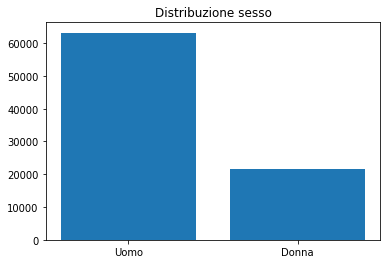

Uomini:  63173
Donne:  21725


In [10]:
#Grafico della distribuzione sesso
sesso = ['Uomo','Donna']
x_genders = list(set(genders))
y_genders = [genders.count(i) for i in x_genders]
plt.bar(sesso,y_genders)
plt.title('Distribuzione sesso')
plt.show()
print("Uomini: ",y_genders[0])
print("Donne: ",y_genders[1])

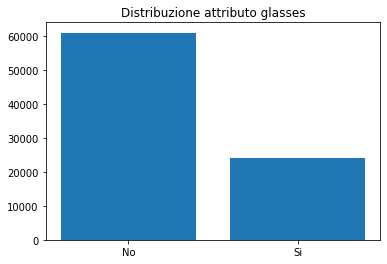

No:  60897
Si:  24001


In [11]:
#Grafico della distribuzione dell'attributo glasses
x_label = ['No','Si']
x_value = list(set(glasses))
y_value = [glasses.count(i) for i in x_value]
plt.bar(x_label,y_value)
plt.title('Distribuzione attributo glasses')
plt.show()
print("No: ",y_value[0])
print("Si: ",y_value[1])

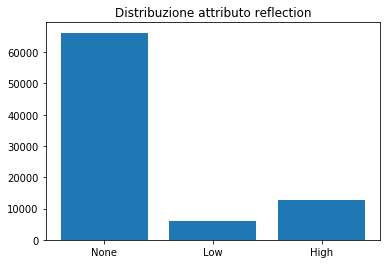

None:  66227
Low:  5962
High:  12709


In [12]:
#Grafico della distribuzione dell'attributo reflectio
x_label = ['None','Low', 'High']
x_value = list(set(reflections))
y_value = [reflections.count(i) for i in x_value]
plt.bar(x_label,y_value)
plt.title('Distribuzione attributo reflection')
plt.show()
print("None: ",y_value[0])
print("Low: ",y_value[1])
print("High: ",y_value[2])

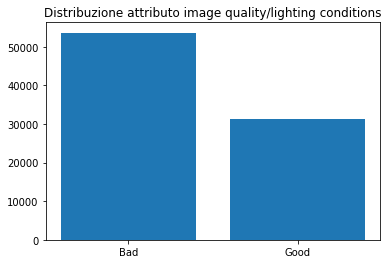

Bad:  53630
Good:  31268


In [13]:
#Grafico della distribuzione dell'attributo image quality
x_label = ['Bad','Good']
x_value = list(set(image_quality))
y_value = [image_quality.count(i) for i in x_value]
plt.bar(x_label,y_value)
plt.title('Distribuzione attributo image quality/lighting conditions')
plt.show()
print("Bad: ",y_value[0])
print("Good: ",y_value[1])


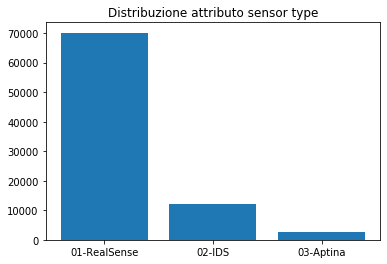

01-RealSense SR300 640x480:  70142
02-IDS Imaging, 1280x1024:  11992
03-Aptina Imagin 752x480:  2764


In [14]:
#Grafico della distribuzione dell'attributo sensor type
x_label = ['01-RealSense','02-IDS','03-Aptina']
x_value = list(set(sensor_type))
y_value = [sensor_type.count(i) for i in x_value]
plt.bar(x_label,y_value)
plt.title('Distribuzione attributo sensor type')
plt.show()
print("01-RealSense SR300 640x480: ",y_value[0])
print("02-IDS Imaging, 1280x1024: ",y_value[1])
print("03-Aptina Imagin 752x480: ",y_value[2])

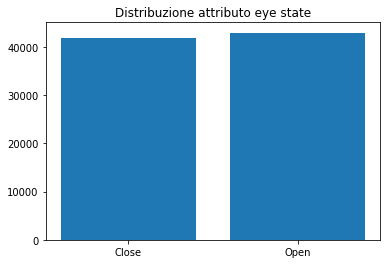

Close:  41946
Open:  42952


In [15]:
#Grafico della distribuzione dell'attributo eye state
x_label = ['Close','Open']
x_value = list(set(eye_state))
y_value = [eye_state.count(i) for i in x_value]
plt.bar(x_label,y_value)
plt.title('Distribuzione attributo eye state')
plt.show()
print("Close: ",y_value[0])
print("Open: ",y_value[1])


In [16]:
#Creazione CSV con etichette

with open('dataset_with_label.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow([ "Image_Name", "Glasses", "Genders", "Reflections","Lighting_conditions/Image_quality", "Sensor_type", "Eye_state"])
 
    for i in range(50000):
        arr = np.array(images[i])
        flat_arr = arr.ravel()
        filewriter.writerow([files_name[i], glasses[i], genders[i], reflections[i], image_quality[i], sensor_type[i], eye_state[i]])



#Creazione CSV senza etichette
with open('dataset_without_label.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow([ "Image_Name", "Glasses", "Genders", "Reflections","Lighting_conditions/Image_quality", "Sensor_type"])
 
    for i in range(len(images)):
        arr = np.array(images[i])
        flat_arr = arr.ravel()
        filewriter.writerow([files_name[i], glasses[i], genders[i], reflections[i], image_quality[i], sensor_type[i]])

### Feature Selection 
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap


In [63]:
data = pd.read_csv("dataset_with_label.csv")
X = data.iloc[:,1:6] #independent columns
y = data.iloc[:,-1] #target column eye_state

### Univariate Selection

In [64]:
#apply SelectKBest class to extract top 5 features 
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(5,'Score')) #print 5  features

                               Specs        Score
2                        Reflections  2132.935200
4                        Sensor_type  1449.041316
0                            Glasses  1384.871264
1                            Genders   758.903912
3  Lighting_conditions/Image_quality   262.925175


### Feature Importance

[0.17010451 0.07457591 0.19342344 0.02566359 0.53623254]


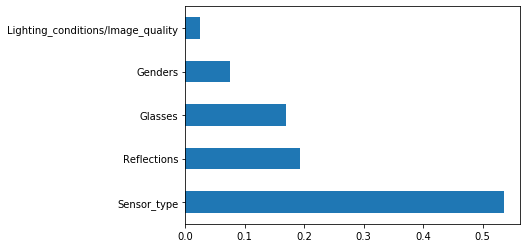

In [65]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Correlation Matrix with Heatmap

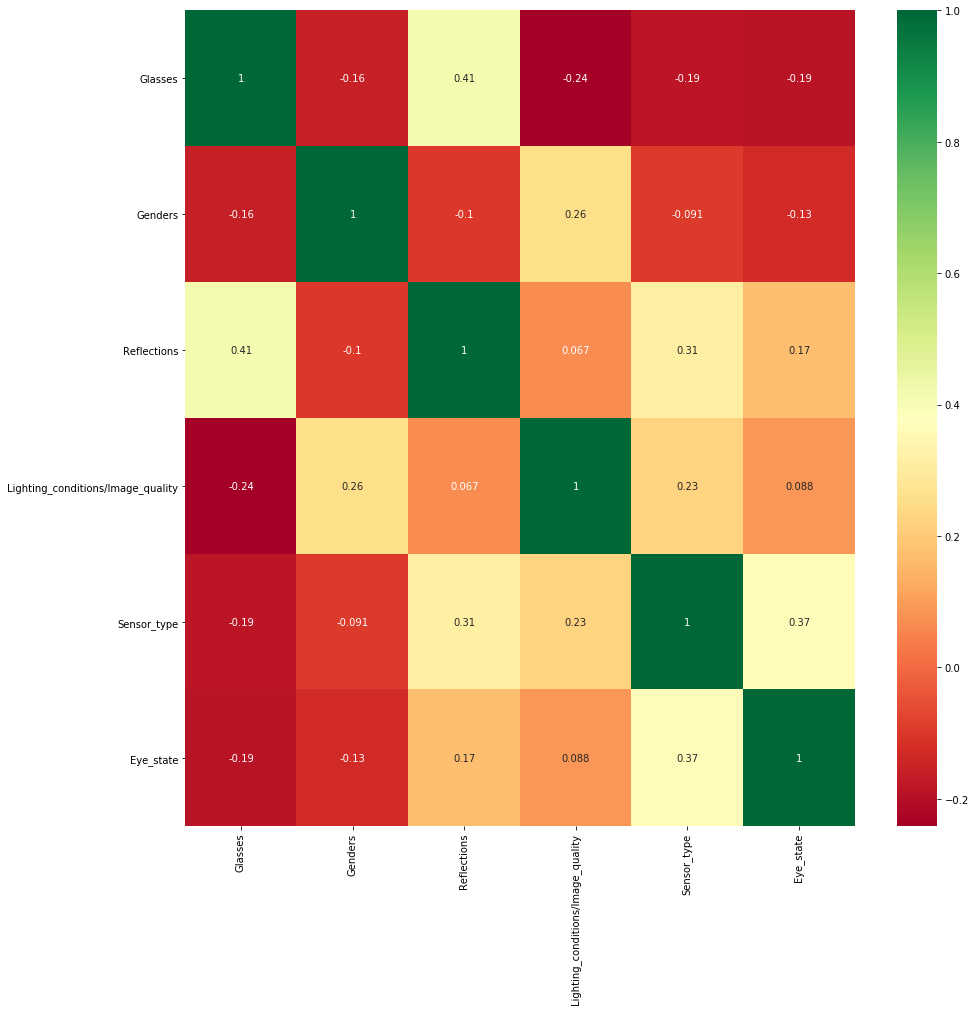

In [61]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map 
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Nome file: s0001_00002_0_0_0_0_0_01.png
Genders: 0
Glasses: 0
Eye_state: 0
Reflections: 0
Image_quality: 0
Sensor_type: 1


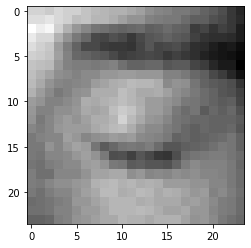

In [17]:
#funzione per lo show di un'immagine. 
def display(img):
    img = np.squeeze(img)  #squeeze remove single-dimensional entries from the shape of an array.
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.show()

idx = 1
sample = images[idx]
print("Nome file:",files_name[idx])
print("Genders:",genders[idx])
print("Glasses:",glasses[idx])
print("Eye_state:",eye_state[idx])
print("Reflections:",reflections[idx])
print("Image_quality:",image_quality[idx])
print("Sensor_type:",sensor_type[idx])
display(images[idx])

In [9]:
#Creazione di un'unica lista contenente le feature associate alle immagini
features = []

for i in range(len(images)):
    
    featElement = np.array([int(genders[i]),int(glasses[i]),int(reflections[i]),int(image_quality[i]),int(sensor_type[i])])
    #featElement = np.array([int(genders[i]),int(reflections[i]),int(image_quality[i]),int(sensor_type[i])])
    features.append(featElement)

features = np.asarray(features)

In [11]:
#Normalizzazione delle immagini
if 'target' not in locals():
    target = eye_state
    images = np.array(images)
    images = images / 255

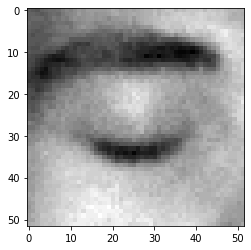

File name: s0001_00121_0_0_0_0_0_01.png
Eye_state: 0
Genders: 0
Glasses: 0
Reflections: 0
Image_quality: 0
Sensor_type: 1


In [12]:
#Altro esempio
idx=120
display(images[idx])
print("File name:",files_name[idx])
print("Eye_state:",target[idx])
print("Genders:",features[idx][0])
print("Glasses:",features[idx][1])
print("Reflections:",features[idx][2])
print("Image_quality:",features[idx][3])
print("Sensor_type:",features[idx][4])

In [13]:
#split dei dati
#oltre ai soliti primi 4 parametri, inserisco name_train e name_test per inserire i nomi dei file per poterli dividere in cartelle
images_train, images_test, feat_train, feat_test, y_train, y_test, fileName_train, fileName_test = train_test_split(images, features, target, files_name, test_size=0.2,random_state=42,shuffle=True)
print("Samples in Training:",images_train.shape[0])
print("Samples in Testing:",images_test.shape[0])


Samples in Training: 67918
Samples in Testing: 16980


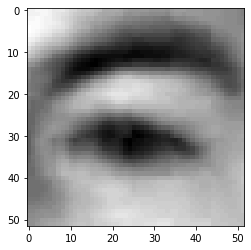

1
[0 0 0 1 1]
s0014_06189_0_0_1_0_1_01.png


In [14]:
idx=1001
display(images_train[idx])
print(y_train[idx])
print(feat_train[idx])
print(fileName_train[idx])

## Build Model

In [ ]:
#Modello preliminare
def create_cnn_model():
    
    #inputs = Input(shape=(IMG_HEIGHT,IMG_WIDTH,3))
    inputs = Input(shape=(IMG_HEIGHT,IMG_WIDTH,1))
    conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
    pool1 = MaxPooling2D(pool_size=(1, 1))(conv1)
    conv2 = Conv2D(32, kernel_size=(3, 3),activation='relu')(pool1)
    pool2 = MaxPooling2D(pool_size=(1, 1))(conv2)
    conv3 = Conv2D(64, kernel_size=(3, 3),activation='relu')(pool2)
    pool3 = MaxPooling2D(pool_size=(1, 1))(conv3)
    #x = MaxPooling2D(pool_size=(2, 2))(conv3)
    x = Dropout(0.25)(pool3)
        
    x = Flatten()(x)     
    
    #shape degli attributi numerici
    featureShape = Input(shape=(5,)) #Shape nel caso in cui si considerano anche le altre feature
    x = keras.layers.Concatenate(axis=1)([x, featureShape]) #Concatenazione delle altre feature alle immagini
    
    dropout = Dropout(0.5)
    model_detector = Dense(128, activation='relu')(x)
    model_detector = dropout(model_detector)
    model_detector = Dense(2, activation='softmax')(model_detector)
   
        
    # Costruzione della CNN
    model = Model([inputs, featureShape], model_detector) 
   # model = Model(inputs, model_detector) 
    model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics =['accuracy'])
   
    # Restituiamo la CNN creata
    return model  

In [19]:
#istanziamo un modello chiamando la funzione sopra definita

model = create_cnn_model()

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 52, 52, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0   

## Train Model

In [71]:
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)


In [72]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.0001, verbose=1,
    baseline=None, restore_best_weights=True)

In [73]:
# Training del modello 
batch_size = 200
nb_epoch = 25
validation = 0.1

time_callback = TimeHistory()
hist_model = model.fit(x = images_train, y = y_train, epochs = nb_epoch, batch_size = batch_size, validation_split=0.1, shuffle=True, callbacks=[time_callback,callback])
#hist_model = model.fit(x = [images_train, feat_train], y = y_train, epochs = nb_epoch, batch_size = batch_size, validation_split=validation, shuffle=True, callbacks=[time_callback])
times = time_callback.times

Train on 61126 samples, validate on 6792 samples
Epoch 1/25
61126/61126 [==============================] - 21s 344us/step - loss: 0.2148 - accuracy: 0.9130 - val_loss: 0.1089 - val_accuracy: 0.9610
Epoch 2/25
61126/61126 [==============================] - 20s 333us/step - loss: 0.0921 - accuracy: 0.9666 - val_loss: 0.0789 - val_accuracy: 0.9701
Epoch 3/25
61126/61126 [==============================] - 21s 338us/step - loss: 0.0667 - accuracy: 0.9759 - val_loss: 0.0592 - val_accuracy: 0.9778
Epoch 4/25
61126/61126 [==============================] - 20s 334us/step - loss: 0.0528 - accuracy: 0.9814 - val_loss: 0.0471 - val_accuracy: 0.9835
Epoch 5/25
61126/61126 [==============================] - 21s 336us/step - loss: 0.0443 - accuracy: 0.9844 - val_loss: 0.0425 - val_accuracy: 0.9862
Epoch 6/25
61126/61126 [==============================] - 20s 334us/step - loss: 0.0378 - accuracy: 0.9864 - val_loss: 0.0366 - val_accuracy: 0.9879
Epoch 7/25
61126/61126 [==============================] -

In [74]:
print(time_callback.times)

[21.003721714019775, 20.338370084762573, 20.664209842681885, 20.410662412643433, 20.56221079826355, 20.397717475891113, 20.656967878341675, 20.395950317382812, 20.372288465499878]


In [18]:
model_path = "img_9_0.15_3CL_0.2"
Path("Modelli/"+model_path).mkdir(parents=True, exist_ok=True)
model.save('Modelli/'+model_path+"/"+model_path+".h5")

NameError: name 'model' is not defined

## Evaluate Model

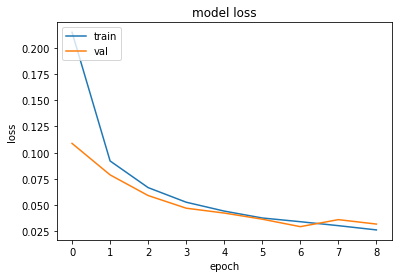

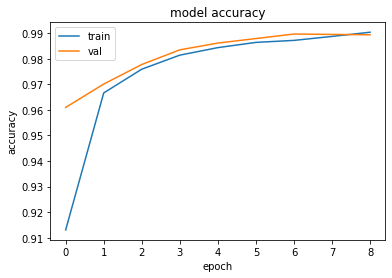

16980/16980 [==============================] - 4s 208us/step


In [77]:
mod_loss = np.mean(hist_model.history['loss'])
mod_val_loss = np.mean(hist_model.history['val_loss'])
mod_accuracy = np.mean(hist_model.history['accuracy'])
mod_val_accuracy = np.mean(hist_model.history['val_accuracy'])

# summarize history for loss
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Modelli/"+model_path+"/"+"model loss")
plt.show()

# summarize history for accuracy
plt.plot(hist_model.history['accuracy'])
plt.plot(hist_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Modelli/"+model_path+"/"+"model accuracy")
plt.show()


#y = np.reshape(feat_test,(1,))
y_prova = np.asarray(y_test)
#result_evaluate = model.evaluate([images_test, feat_test], y_prova)
result_evaluate = model.evaluate(images_test, y_test)

test_loss = result_evaluate[0]
test_accuracy = result_evaluate[1]
mean_epoch_time = np.mean(time_callback.times)

#Salvataggio informazioni modello
f= open("Modelli/"+model_path+"/result.txt","w+")
f.write("Train loss: "+ str(mod_loss)+"\n")
f.write("val_loss: " + str(mod_val_loss)+"\n")
f.write("Train accuracy: "+ str(mod_accuracy)+"\n")
f.write("Train val_accuracy: "+ str(mod_val_accuracy)+"\n")
f.write("Test loss: "+str(test_loss)+"\n")
f.write("Test accuracy: "+str(test_accuracy)+"\n")
f.write("Mean epoch time: "+str(mean_epoch_time)+"\n")
f.close()
tf.keras.utils.plot_model(model, "Modelli/"+model_path+"/model.png",show_shapes=True) 
np.save("Modelli/"+model_path+"/hist.npy",hist_model)

In [78]:
with open('models.csv', 'a') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    #filewriter.writerow([ "Model Name", "Glasses", "Genders", "Reflections","Image_quality", "Sensor_type","Epochs","% Dropout","Convolutional Layers","% Validation","% Test set","Train loss","Train accuracy","Val loss","Val accuracy","Test loss","Test accuracy","Mean epoch time","Note"])
    filewriter.writerow([model_path, "", "", "","", "",nb_epoch,dropout,3,validation*100,20,mod_loss,mod_accuracy,mod_val_loss,mod_val_accuracy,test_loss,test_accuracy, mean_epoch_time,""])

In [21]:
# Modello creato da noi
loaded_model = load_model("firstModel.h5")

In [22]:
# Modello creato da altri sviluppatori e addestrato su un training set differente
loaded_model2 = load_model("cnnCat2.h5")

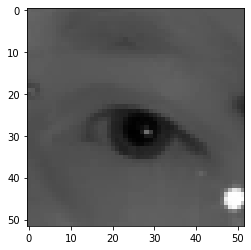


[Prob. occhio chiuso, Prob. occhio aperto]
[[0. 1.]]
[[0.826 0.174]]


In [23]:
# Vediamo i risultati prodotti dai due modelli su un'immagine di test

idx=1544
display(images_test[idx])
image = images_test[idx].reshape((-1,images_test[idx].shape[0],images_test[idx].shape[1],1))
print("")
print("[Prob. occhio chiuso, Prob. occhio aperto]")
print(np.around(loaded_model.predict(image),3))


image = images_test[idx]
image = cv2.resize(image, dsize=(24,24))
image = image.reshape((-1,image.shape[0],image.shape[1],1))
print(np.around(loaded_model2.predict(image),3))


In [24]:
image_test_resize = []
for img in images_test:
        image = cv2.resize(img, dsize=(24,24))
        image = image.reshape((image.shape[0],image.shape[1],1))
        image_test_resize.append(image)

In [25]:
image_test_resize = np.array(image_test_resize)
#image_test_resize = image_test_resize / 255

In [26]:
from keras.utils.np_utils import to_categorical
categorical_labels = to_categorical(y_test, num_classes=2)

In [27]:
# Effettuiamo una valutazione del modello non creato da noi sul nostro test set. Primo valore: Test loss, Secondo valore: Test accuracy.
result_evaluate = loaded_model2.evaluate(image_test_resize, categorical_labels)
print(result_evaluate)

16980/16980 [==============================] - 3s 193us/step
[1.0439885602542172, 0.6965253353118896]


In [28]:
# Valutazione del nostro modello sul test set. Primo valore: Test loss, Secondo valore: Test accuracy.
result_evaluate = loaded_model.evaluate(images_test, y_test)
print(result_evaluate)

16980/16980 [==============================] - 8s 443us/step
[0.09257007868010529, 0.9669022560119629]


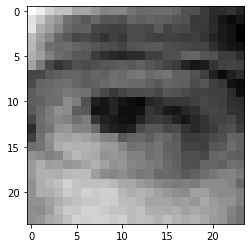


[Prob. occhio chiuso, Prob. occhio aperto]


In [21]:
# Valutazione di un'immagine acquisita dalla demo creata
image = cv2.imread("right.jpg", cv2.IMREAD_GRAYSCALE)
display(image)
#image = cv2.resize(image, dsize=(24,24))
image = image.reshape((-1,image.shape[0],image.shape[1],1))
image = image/255
print("")
print("[Prob. occhio chiuso, Prob. occhio aperto]")
print(np.around(loaded_model.predict(image),3))